In [1]:
import pandas as pd
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
train = pd.read_csv("dataset/cat_dog_classification/train.csv")
test = pd.read_csv("dataset/cat_dog_classification/val.csv")

In [3]:
train["image:FILE"]=train["image:FILE"].apply(lambda x: "dataset/cat_dog_classification/"+x)
test["image:FILE"]=test["image:FILE"].apply(lambda x: "dataset/cat_dog_classification/"+x)

In [4]:
size=(256,256)
train_images = []
for i in range(len(train)):
    f = train.iloc[i]['image:FILE']
    img = cv2.imread(f)
    img=cv2.resize(img,size)
    train_images.append(img)
test_images = []

for i in range(len(test)):
    f = test.iloc[i]['image:FILE']
    img = cv2.imread(f)
    img=cv2.resize(img,size)
    test_images.append(img)

In [5]:
from sklearn.decomposition import PCA
concat = np.concatenate([train_images,test_images])
concat=concat.reshape(len(concat),-1)

pca = PCA(n_components=300)
pca.fit(concat)
sum(pca.explained_variance_ratio_)

0.9929017472438368

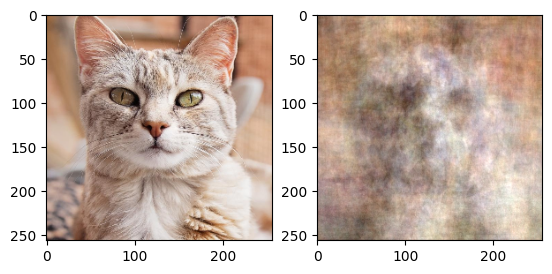

In [6]:
from random import randint
from skimage import io

cat1="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS4Inf60l0egQ8i49C_lylZJl90NVuPLWmG7Q&usqp=CAU"
cat1="https://static01.nyt.com/images/2021/09/14/science/07CAT-STRIPES/07CAT-STRIPES-superJumbo.jpg"
cat2="https://bestfriends.org/sites/default/files/styles/hero_mobile/public/hero-dash/Asana3808_Dashboard_Standard.jpg?h=ebad9ecf&itok=cWevo33k"

original = io.imread(cat2)
original=cv2.resize(original,size)
original_flatten = original.reshape(1,-1)

zipped = pca.transform(original_flatten)
restored = pca.inverse_transform(zipped).reshape((size[0],size[1],3))
restored=np.int32(restored)
restored[restored<0]=0
restored[restored>255]=255

plt.subplot(1,2,1)
plt.imshow(original)
plt.subplot(1,2,2)
plt.imshow(restored)